In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from matplotlib import cm

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import plotting
from src.utils import combine_prediction_files, compute_network_avg_prediction

# Load in the necessary data

## The model results summaries

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'

results_df = pd.read_csv(os.path.join(datadir, 's_models', 'selected_features', 'all.stat.results.csv'))
results_allfeats_df = pd.read_csv(os.path.join(datadir, 's_models','all_features', 'all.stat.results.csv'))

In [3]:
results_df.head()

,cv_mean_best,cv_std_best,cv_ind_sel,cv_mean_sel,cv_std_sel,C_best,gamma_best,C_sel,gamma_sel,train_r2,train_rmse,test_r2,test_rmse,holdout_r2,holdout_rmse,station,phase
0,0.955206,0.010267,30,0.953798,0.010062,10000.0,0.001,10.0,0.010,0.959,0.116,0.966,0.106,0.923,0.147,YHB,S
1,0.941397,0.012438,29,0.940225,0.012378,100.0,0.001,10.0,0.001,0.944,0.145,0.943,0.138,0.962,0.094,YHL,S
2,0.947345,0.007046,30,0.947345,0.007046,10.0,0.010,10.0,0.010,0.951,0.118,0.944,0.121,0.968,0.102,YMR,S
3,0.885576,0.009467,30,0.881172,0.011386,100.0,0.010,10.0,0.010,0.892,0.154,0.873,0.155,0.875,0.166,YHH,S
4,0.917705,0.029998,24,0.913044,0.019796,100.0,0.010,1.0,0.100,0.953,0.126,0.911,0.157,NaN,NaN,B207,S


## The example counts

In [4]:
## READ IN DF FOR COUNTS ##
split_cnts = pd.read_csv(os.path.join(datadir, 'feature_splits', 's.station.ex.counts.csv'))
df_2022 = pd.read_csv(os.path.join(datadir, 'feature_splits', 's.2022.csv'))
####
# Count 2022 stations, merge with train and test cnts
split_cnts = split_cnts.merge(
    df_2022.groupby('station')['event_identifier'].count().reset_index().rename(
        columns={'event_identifier': 'cnt_holdout'}), on='station', how='left')
# Filter to stations with trained models
split_cnts = split_cnts[split_cnts['station'].isin(results_df.station)]
# Fill Nan values with 0
split_cnts['cnt_holdout'] = split_cnts['cnt_holdout'].fillna(0)
# Change cnt types to int
split_cnts = split_cnts.astype({'cnt_train': int, 'cnt_test':int, 'cnt_holdout':int})
split_cnts.head()

,station,cnt_train,cnt_test,cnt_holdout
0,YNR,1784,454,11
1,YMR,1293,303,64
2,YMC,1157,306,65
3,YHB,942,227,92
4,YHH,883,214,71


## The model predictions

In [5]:
all_stats = results_df['station']
pred_path = os.path.join(datadir,'s_models', 'selected_features')
train_preds_df = combine_prediction_files(all_stats, pred_path,'S', 'train')
test_preds_df = combine_prediction_files(all_stats, pred_path,'S', 'test')
train_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60000622,0.694976,0.797771,YHB
1,60001367,2.155231,2.033984,YHB
2,60001437,2.543478,2.548688,YHB
3,60001517,2.080642,2.131175,YHB
4,60001572,1.630087,1.717702,YHB
...,...,...,...,...
211,60469767,0.833576,0.866486,YDD
212,60469802,0.915068,0.910862,YDD
213,60469952,1.829164,2.104212,YDD
214,60469997,0.838042,0.783988,YDD


In [6]:
holdout_preds_df = combine_prediction_files(df_2022['station'].unique(), pred_path,'S', 'holdout')
holdout_preds_df

,Evid,magnitude,predicted_magnitude,station
0,60475807,2.403296,2.210731,YTP
1,60476287,1.403085,1.159601,YTP
2,60480912,1.756739,1.590256,YTP
3,60482602,2.059862,1.871713,YTP
4,60483757,2.233690,2.172119,YTP
...,...,...,...,...
6,60506317,1.286518,1.308663,YNR
7,60506367,0.746196,1.008110,YNR
8,60506652,0.838678,0.879211,YNR
9,60506702,0.954297,1.122642,YNR


# Look at the scores from various splits

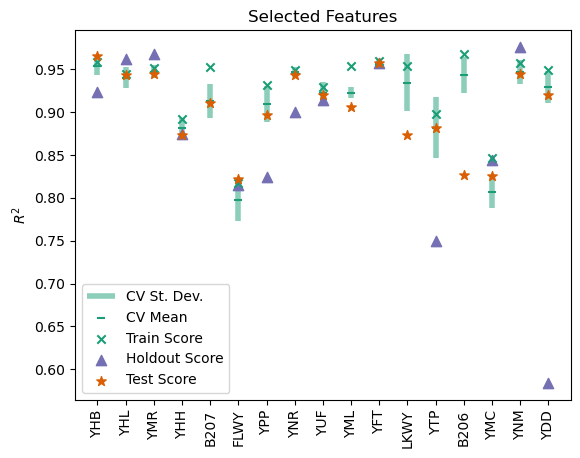

In [7]:
plotting.plot_station_splits_scores_scatter(results_df, title='Selected Features')

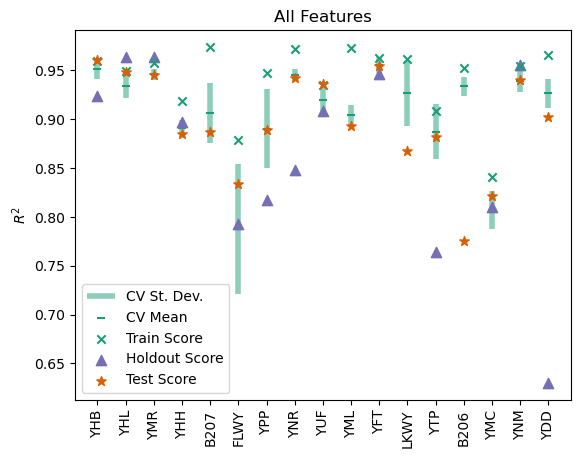

In [8]:
plotting.plot_station_splits_scores_scatter(results_allfeats_df, title='All Features')

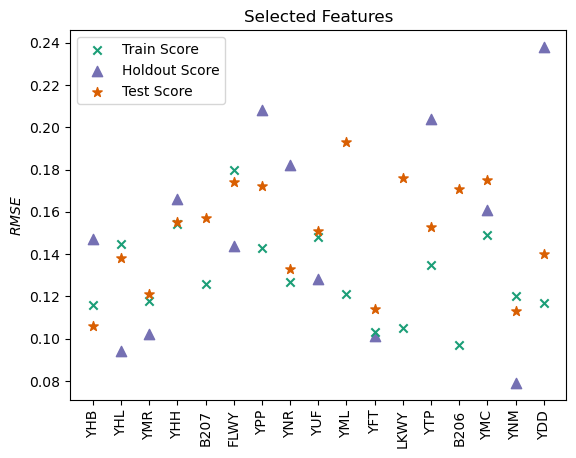

In [9]:
plotting.plot_station_splits_scores_scatter(results_df, 
                            metric='rmse', 
                            ylabel='RMSE',
                            title='Selected Features')

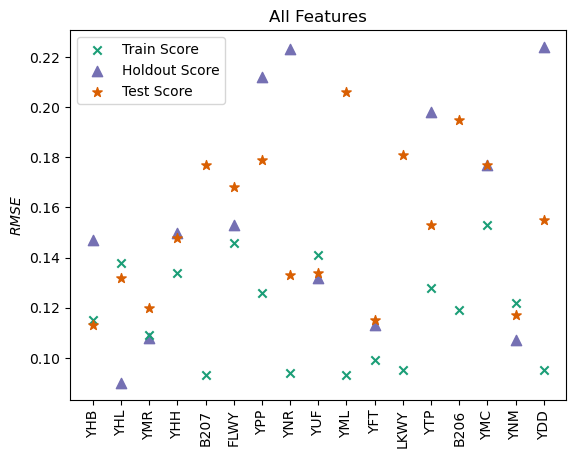

In [10]:
plotting.plot_station_splits_scores_scatter(results_allfeats_df, 
                            metric='rmse', 
                            ylabel='RMSE',
                            title='All Features')

# Compare the scores of a single split using different features

Index(['station', 'train_r2_x', 'train_r2_y'], dtype='object')


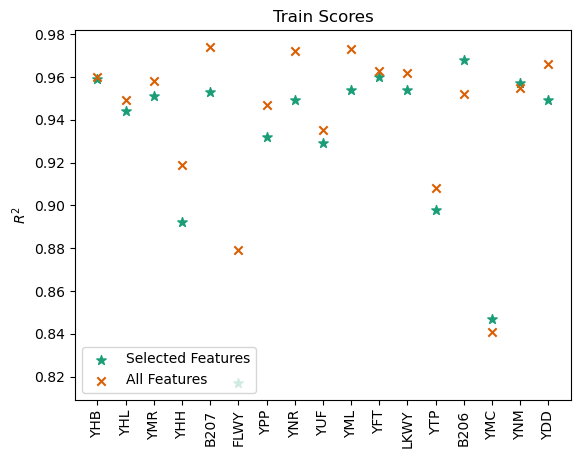

In [11]:
plotting.compare_score_different_feats_scatter(results_df, 
                               results_allfeats_df,
                               'Selected Features',
                               'All Features',
                               col_name='train_r2',
                               title='Train Scores'
                               )

Index(['station', 'test_r2_x', 'test_r2_y'], dtype='object')


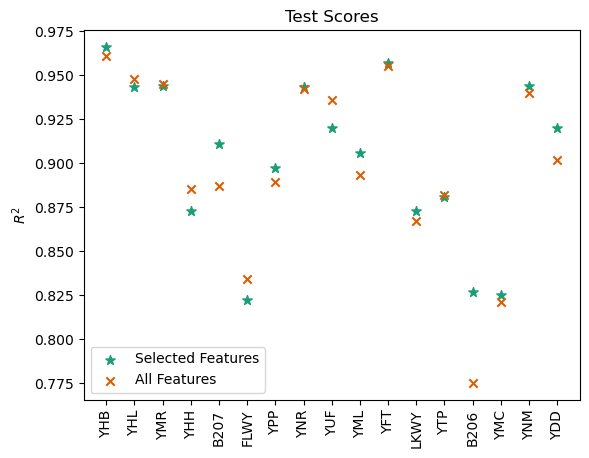

In [12]:
plotting.compare_score_different_feats_scatter(results_df, 
                               results_allfeats_df,
                               'Selected Features',
                               'All Features',
                               title='Test Scores'
                               )

Index(['station', 'holdout_r2_x', 'holdout_r2_y'], dtype='object')


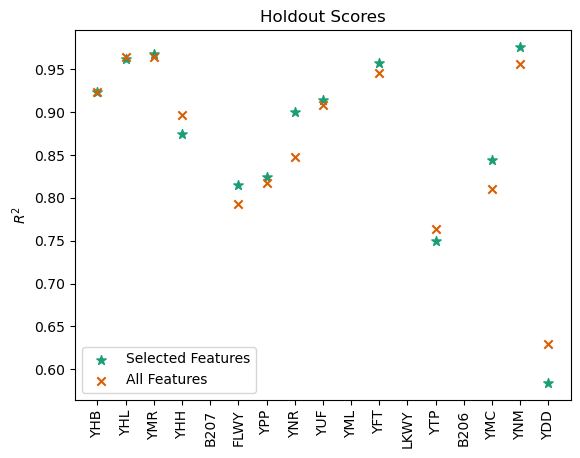

In [13]:
plotting.compare_score_different_feats_scatter(results_df, 
                               results_allfeats_df,
                               'Selected Features',
                               'All Features',
                               col_name='holdout_r2',
                               title='Holdout Scores'
                               )

# Make tables/heatmaps to compare the scores

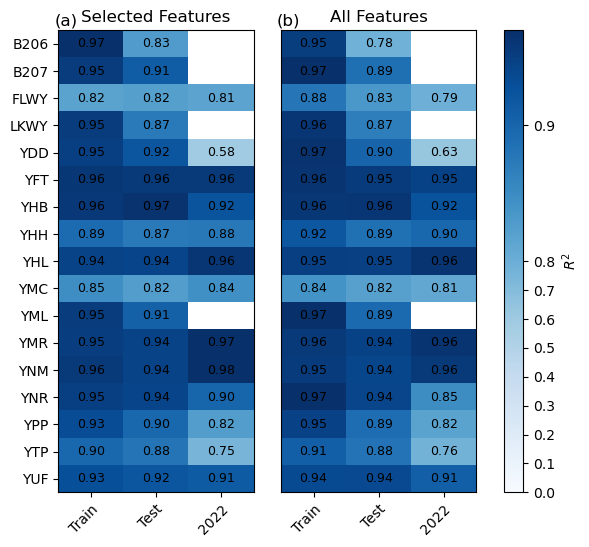

In [14]:
fig, axes = plt.subplots(1, 3, width_ratios=[2, 2, 0.2], figsize=(6, 6))

midpoint_normalize = True
midpoint = 0.8
cmap_min = 0
cmap_max = 0.97
xlabels=['Train', 'Test', '2022']

im1 = plotting.scores_heatmap(results_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='Selected Features',
                        ax=axes[0],
                        show_ylabels=True,
                        show_cbar=False,
                        xticklabels=xlabels,
                        tablefontsize=9)
im2 = plotting.scores_heatmap(results_allfeats_df.sort_values('station'),
                        midpoint_normalize=midpoint_normalize,
                        midpoint=midpoint,
                        cmap_min=cmap_min,
                        cmap_max=cmap_max,
                        title='All Features',
                        ax=axes[1],
                        show_ylabels=False,
                        show_cbar=False,
                        xticklabels=xlabels,
                        tablefontsize=9)
plt.colorbar(im2, cax=axes[2], label=f'$R^2$', ticks=np.arange(0, 1.0, 0.1))

sp_labels = ['(a)', '(b)']
for i, ax in enumerate(axes[:-1]):
    ax.text(-0.02, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)
    
#fig.tight_layout()
fig.show()

cmap min set to -0.062000000000000055
cmap max set to 0.052000000000000046
cmap midpoint set to 107.0
cmap min set to 0
cmap max set to 1784


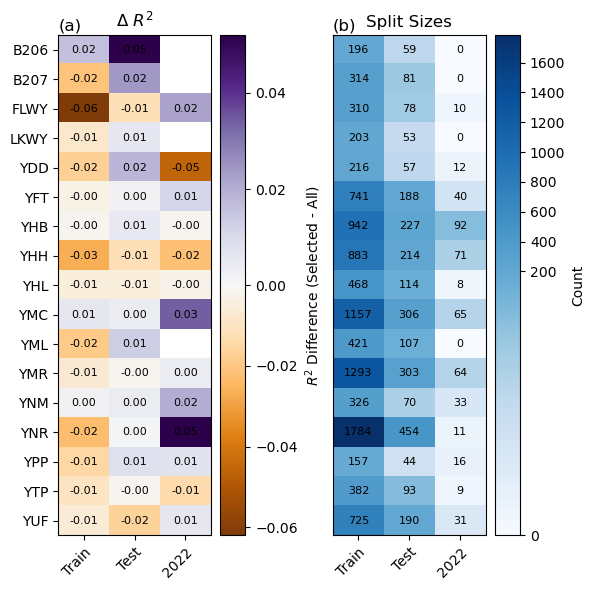

In [15]:
diff_df = results_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']] - results_allfeats_df.sort_values('station')[['train_r2', 'test_r2', 'holdout_r2']]
diff_df['station'] = results_df.sort_values('station')['station']
fig, axes = plt.subplots(1, 2, figsize=(6, 6)) #, width_ratios=[2, 2, 0.2], figsize=(6, 6))

im1 = plotting.scores_heatmap(diff_df,
                             ax = axes[0],
                            midpoint_normalize=True,
                            midpoint=0,
                            cmap_max = None,
                            cmap_min = None,
                            title='$\Delta$ $R^2$',
                            show_ylabels=True,
                            show_cbar=True,
                            xticklabels=xlabels,
                            cbar_label=f'$R^2$ Difference (Selected - All)',
                            cmap=cm.PuOr,
                            tablefontcolor='k',
                            tablefontsize=8,
                            tight_layout=True,
                            )

im2 = plotting.scores_heatmap(split_cnts.sort_values('station'),
                        ax=axes[1],
                        cols=['cnt_train', 'cnt_test', 'cnt_holdout'],
                        midpoint_normalize=True,
                        midpoint=None,
                        title='Split Sizes',
                        show_ylabels=False,
                        show_cbar=True,
                        xticklabels=xlabels,
                        cbar_label=f'Count',
                        cmap=cm.Blues,
                        tablefontcolor='k',
                        tablefontsize=8,
                        tight_layout=True,
                        tablevalueprec=0)

sp_labels = ['(a)', '(b)']
for i, ax in enumerate(axes):
    ax.text(0.00, 
            1.01, 
            sp_labels[i], 
            transform=ax.transAxes,
            fontsize=12)
    
fig.tight_layout()

# Actual vs predicted plots

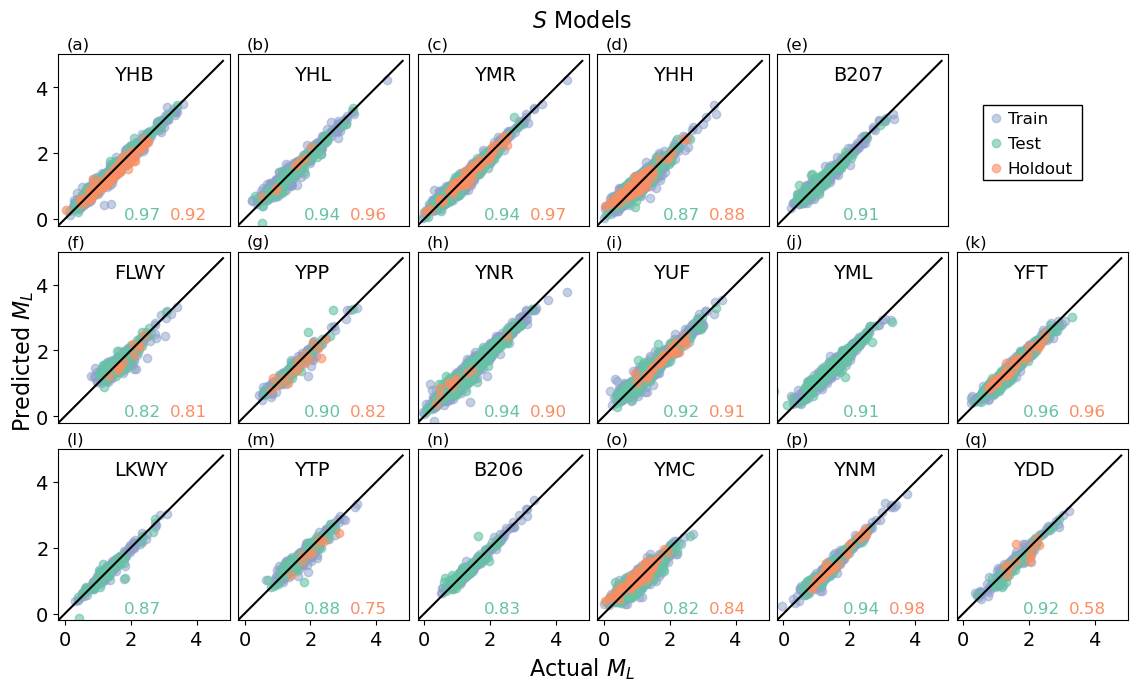

In [16]:
plotting.actual_v_predicted(results_df,
                     train_preds_df, 
                     test_preds_df,
                     holdout_preds_df,
                     inner_ticks_on=False,
                     title='$\it S$ Models',
                     figsize=(11, 6.5),
                     colors=['#8da0cb', '#66c2a5', '#fc8d62'],
                     alphas=[0.5, 0.6, 0.6],
                     linestyle='-')

# Average the predictions

In [17]:
test_avg_df = compute_network_avg_prediction(test_preds_df)
holdout_avg_df = compute_network_avg_prediction(holdout_preds_df)

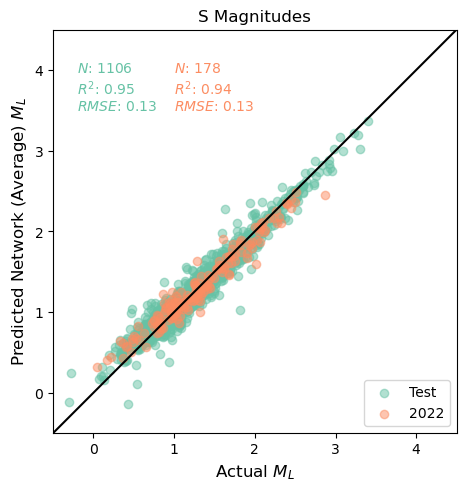

In [19]:
plotting.actual_v_network_avg_prediction([test_avg_df, holdout_avg_df],
                                    title='S Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])

In [20]:
train_preds_df.iloc[train_preds_df['magnitude'].argmax()]

Evid                   60203137
magnitude              4.326333
predicted_magnitude    4.228284
station                     YHL
Name: 69, dtype: object

In [21]:
holdout_preds_df.iloc[holdout_preds_df['magnitude'].argmax()]

Evid                   60485717
magnitude              2.875659
predicted_magnitude    2.449452
station                     YTP
Name: 8, dtype: object

In [22]:
test_preds_df.iloc[test_preds_df['magnitude'].argmax()]

Evid                   60071847
magnitude               3.40459
predicted_magnitude     3.44596
station                     YHB
Name: 110, dtype: object

# Average predictions when using all features

In [23]:
all_stats = results_df['station']
pred_path = os.path.join(datadir,'s_models', 'all_features')
train_preds_allfeat_df = combine_prediction_files(all_stats, pred_path,'S', 'train')
test_preds_allfeat_df = combine_prediction_files(all_stats, pred_path,'S', 'test')
holdout_preds_allfeat_df = combine_prediction_files(df_2022['station'].unique(), pred_path,'S', 'holdout')


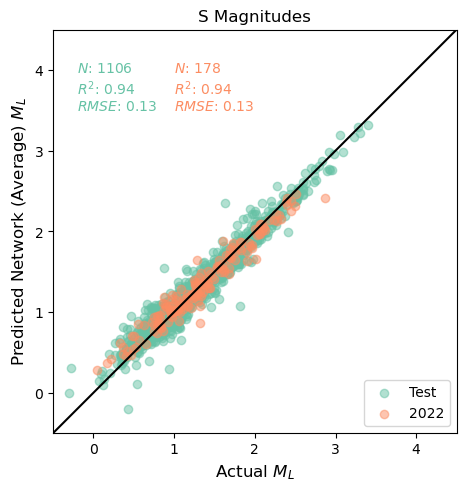

In [24]:
test_avg_allfeat_df = compute_network_avg_prediction(test_preds_allfeat_df)
holdout_avg_allfeat_df = compute_network_avg_prediction(holdout_preds_allfeat_df)
plotting.actual_v_network_avg_prediction([test_avg_allfeat_df, holdout_avg_allfeat_df],
                                    title='S Magnitudes',
                                    plot_lims=[-0.5, 4.5],
                                    alphas=[0.5, 0.5],
                                    legend_labels=['Test', '2022'],
                                    plot_legend=True,
                                    marker_colors=['#66c2a5', '#fc8d62'],
                                    text_x = [-0.2, 0.0],
                                    text_y=[-1.0, -1.0])